Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages
Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [42]:
# Import libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


In [43]:
#Connect to google drive
from google.colab import drive

In [44]:
#Mount the drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [45]:
#Set Project Path
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [46]:
#Set project path for labels
dataset_file_labels = project_path + 'Labels.csv'

In [47]:
#import the labels into a data frame
import pandas as pd
data_lbl = pd.read_csv(dataset_file_labels)

In [48]:
data_lbl.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [49]:
#Print shape of data
data_lbl.shape

(4750, 1)

In [50]:
#set image file path name
data_file_img=project_path+'images.npy'

In [51]:
#upload data images
data_img = np.load(data_file_img)

In [52]:
len(data_img)

4750

In [53]:
#print image shape
data_img.shape

(4750, 128, 128, 3)

In [54]:
#summarize number of plant seedling images and counts
data_lbl['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

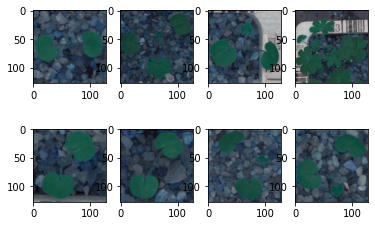

In [55]:
# Visualize Images in Data Set
from matplotlib import pyplot as plt
from PIL import Image
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(data_img[i])  

Data Pre-Processing

In [56]:
images=data_img
classes=data_lbl

Normalization

In [57]:
images=images/255.0 # Division by 255


Applying Gaussian Blur

In [58]:
from scipy.ndimage.filters import gaussian_filter
#Applied Gaussian blur sigma=.8 after multiple iterations
blurred = gaussian_filter(images, sigma=.8)

Visualizing Original Data Before applying gaussian blur

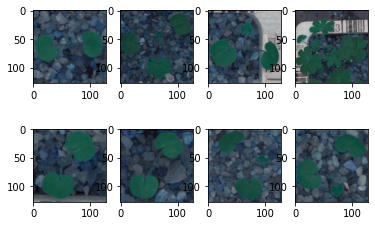

In [59]:
from matplotlib import pyplot as plt
from PIL import Image
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(data_img[i])
    

Visualizing images after applying Gaussian blur

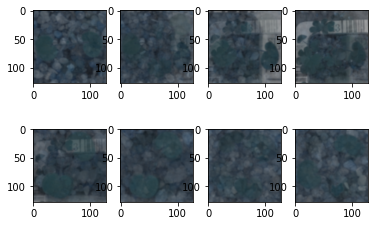

In [61]:
from matplotlib import pyplot as plt
from PIL import Image
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blurred[i])  

Make Data Compatible

Normalization of labels

In [62]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data_lbl)


Print the label for y[0]

In [63]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [64]:
images=blurred

Split the dataset into training, testing, and validation set.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=7)

In [66]:
random_seed = 3
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [67]:
#print image shape
data_img.shape

(4750, 128, 128, 3)

Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
Since the data images are aleady in the required shape, there is no need to re-shape the data



Building CNN Models. Define Layers

In [68]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
# Set the CNN model 

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [69]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

**Use ImageDataGenerator to create a test and training set data generators and use fit_generator() function to train the model**

In [70]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

Fit and evaluate model and print confusion matrix. (10 Marks)

In [71]:
model.fit(X_train, y_train, epochs = 150, validation_data = (X_val,Y_val),batch_size = batch_size)

104/104 [==============================] - 2s 21ms/step - loss: 0.6124 - accuracy: 0.8000 - val_loss: 0.4961 - val_accuracy: 0.8247
Epoch 97/150
104/104 [==============================] - 2s 21ms/step - loss: 0.6127 - accuracy: 0.8051 - val_loss: 0.5012 - val_accuracy: 0.8345
Epoch 98/150
104/104 [==============================] - 2s 21ms/step - loss: 0.5845 - accuracy: 0.8048 - val_loss: 0.4962 - val_accuracy: 0.8247
Epoch 99/150
104/104 [==============================] - 2s 21ms/step - loss: 0.6742 - accuracy: 0.7916 - val_loss: 0.5370 - val_accuracy: 0.8065
Epoch 100/150
104/104 [==============================] - 2s 21ms/step - loss: 0.6803 - accuracy: 0.8096 - val_loss: 0.6437 - val_accuracy: 0.7798
Epoch 101/150
104/104 [==============================] - 2s 21ms/step - loss: 0.6138 - accuracy: 0.7928 - val_loss: 0.6374 - val_accuracy: 0.7714
Epoch 102/150
104/104 [==============================] - 2s 21ms/step - loss: 0.6255 - accuracy: 0.7943 - val_loss: 0.3952 - val_accuracy: 0.

In [72]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5342665910720825
Test accuracy: 0.8230336904525757


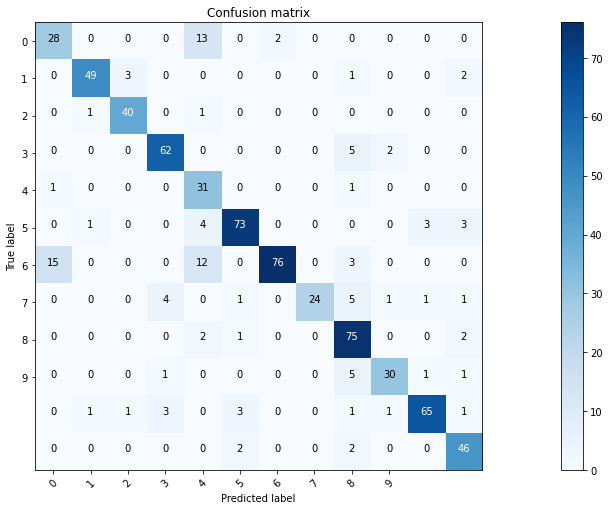

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


In [75]:
Predicted_classes = model.predict_classes(X_test)

In [76]:
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]

In [77]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [78]:
i=2

Predicted class: Fat Hen
Actual class: Fat Hen


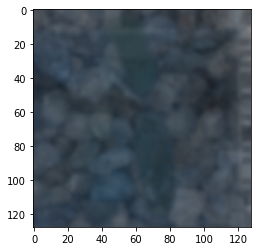

In [79]:
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])

Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [80]:
i=3

Predicted class: Fat Hen
Actual class: Fat Hen


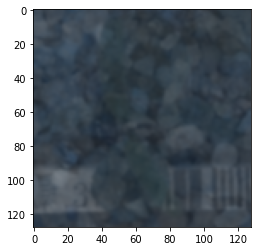

In [81]:
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])

Predicted class: Small-flowered Cranesbill
Actual class: Shepherds Purse


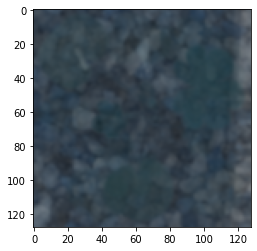

In [82]:
i=33
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])

Predicted class: Fat Hen
Actual class: Maize


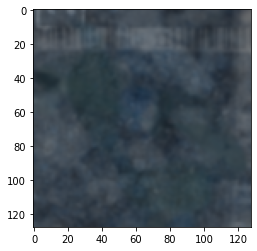

In [83]:
i=36
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])

Predicted class: Charlock
Actual class: Loose Silky-bent


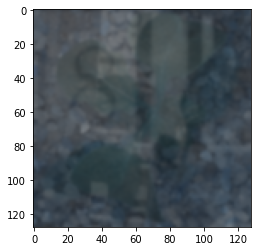

In [84]:
i=59
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])